
# Image Classification with CNN




------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)

In [2]:
print(tf.__version__)

2.8.0


## The Data

**Download the fashion mnist dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset") 

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
np.array(np.unique(y_train, return_counts=True)).T

array([[   0, 6000],
       [   1, 6000],
       [   2, 6000],
       [   3, 6000],
       [   4, 6000],
       [   5, 6000],
       [   6, 6000],
       [   7, 6000],
       [   8, 6000],
       [   9, 6000]], dtype=int64)

In [7]:
# Checking the shape of one image
X_train[9].shape

(28, 28)

## Visualizing the Data

**Using matplotlib show an image from the data set.**

In [8]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
X_train[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         82, 122,  37,   0,   5,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  38,
        100,  28, 121,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  86,
         43,   0, 136,  15,   0,   2,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0, 104,
         30,   0, 102,  40,   0,   3,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0, 111,
          2,   0,  73,  81,   0,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  17,  87,
          0,   0,  45,  81,   0,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

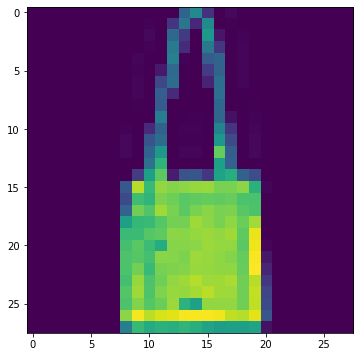

In [10]:
plt.imshow(X_train[200])

In [11]:
classes[int(y_train[200])]

'Bag'

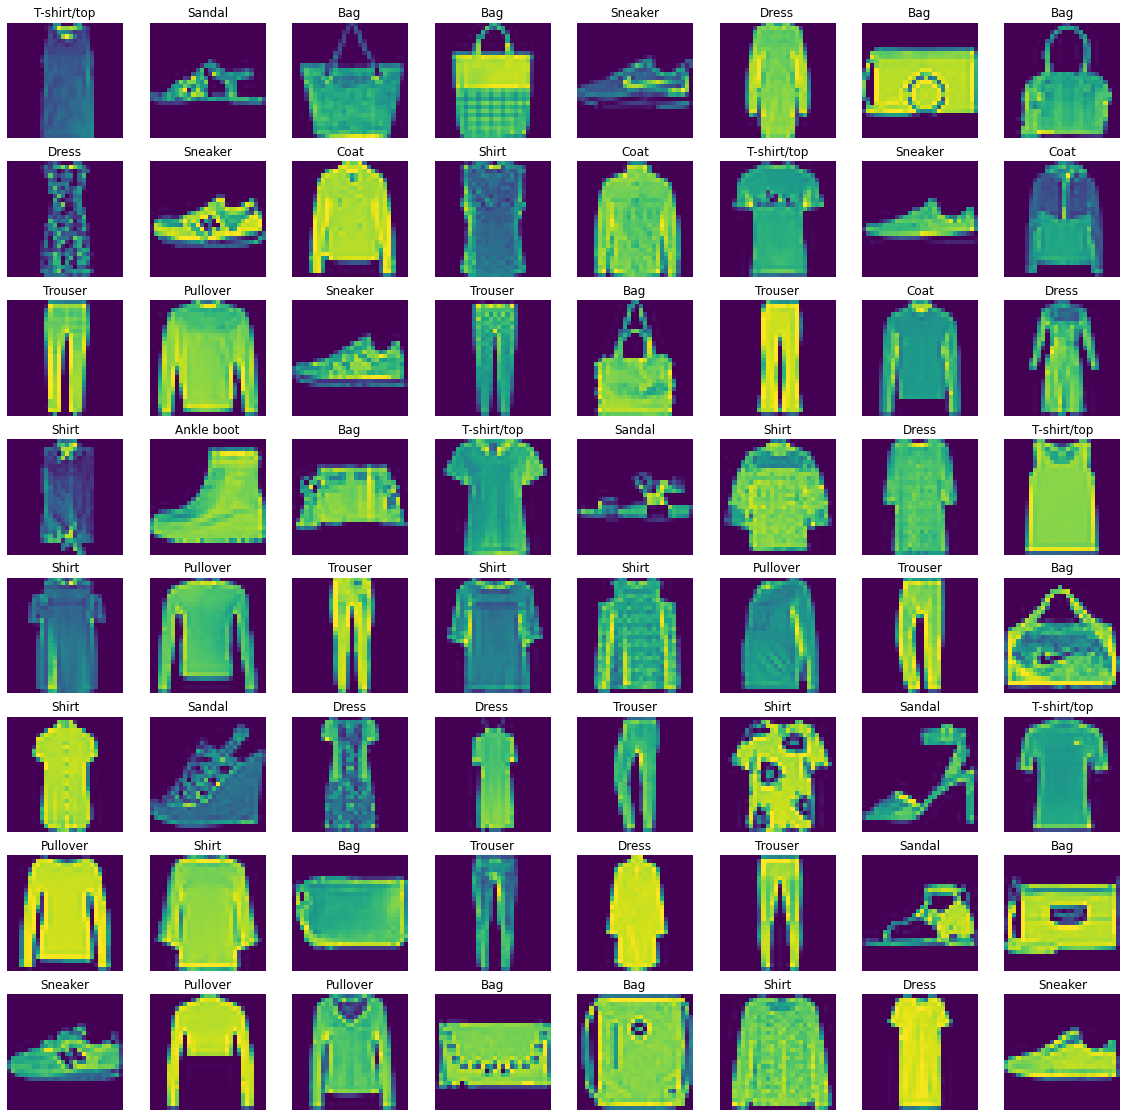

In [12]:
# more samples

plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(8, 8, i+1, label=classes[int(y_train[rand_index])])
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index]) 

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [13]:
X_train[200].min(), X_train[200].max()

(0, 255)

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [15]:
X_train[200].min(), X_train[200].max()

(0.0, 1.0)

**Reshape the X into 4 dimension**

In [16]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [17]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [18]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [22]:
y_cat_train = to_categorical(y_train, 10) 
y_cat_test = to_categorical(y_test, 10)

In [23]:
y_cat_train.shape, y_cat_test.shape

((60000, 10), (10000, 10))

In [24]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [26]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
         
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))  

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))  # output layer

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [28]:
model.fit(X_train, y_cat_train, batch_size=32, epochs=10, validation_data=(X_test,y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 69s 36ms/step - loss: 0.3959 - accuracy: 0.8607 - val_loss: 0.3152 - val_accuracy: 0.8868
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2789 - accuracy: 0.9016 - val_loss: 0.2916 - val_accuracy: 0.8981
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2549 - accuracy: 0.9110 - val_loss: 0.2823 - val_accuracy: 0.8997
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2450 - accuracy: 0.9147 - val_loss: 0.2894 - val_accuracy: 0.9032
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2363 - accuracy: 0.9192 - val_loss: 0.2948 - val_accuracy: 0.9047
Epoch 6/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2321 - accuracy: 0.9193 - val_loss: 0.2999 - val_accuracy: 0.9058
Epoch 7/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2276 - accuracy: 0.9216 - val_loss: 0.2922 -

**Plot values of metrics you used in your model.**

In [29]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.395922,0.860667,0.315217,0.8868
1,0.278860,0.901567,0.291629,0.8981
2,0.254892,0.910983,0.282281,0.8997
3,0.244982,0.914700,0.289430,0.9032
4,0.236306,0.919217,0.294778,0.9047


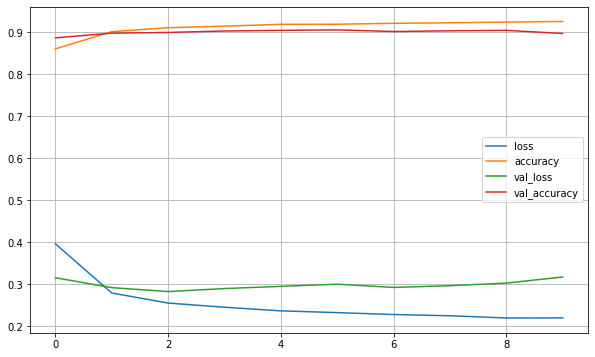

In [30]:
losses.plot()
plt.grid()

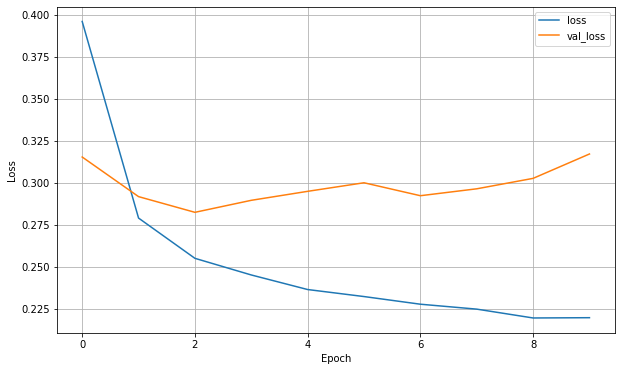

In [31]:
plt.plot(losses.loss, label="loss")
plt.plot(losses.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid()
plt.show()

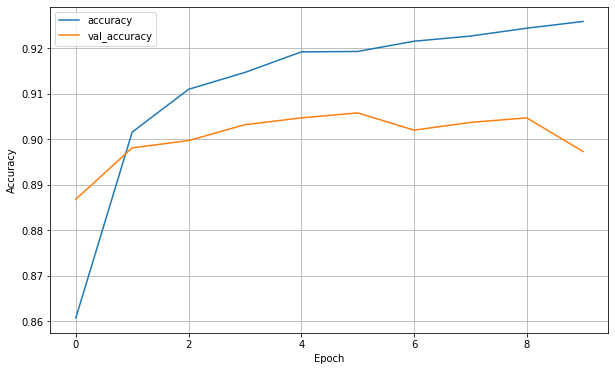

In [32]:
plt.plot(losses.accuracy, label="accuracy")
plt.plot(losses.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.grid()
plt.show()

**Train the model using earlystop.**

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [35]:
model.fit(X_train, y_cat_train, batch_size=32, epochs=10, validation_data=(X_test,y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2176 - accuracy: 0.9259 - val_loss: 0.3669 - val_accuracy: 0.8998
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2135 - accuracy: 0.9272 - val_loss: 0.3577 - val_accuracy: 0.8976
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2135 - accuracy: 0.9271 - val_loss: 0.3262 - val_accuracy: 0.8973
Epoch 4/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2120 - accuracy: 0.9293 - val_loss: 0.3018 - val_accuracy: 0.9026
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2071 - accuracy: 0.9306 - val_loss: 0.3271 - val_accuracy: 0.8950
Epoch 6/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2069 - accuracy: 0.9301 - val_loss: 0.3284 - val_accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2069 - accuracy: 0.9304 - val_loss: 0.3606 -

**Plot values of metrics you used in your model.**

In [36]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.217624,0.925950,0.366885,0.8998
1,0.213522,0.927183,0.357668,0.8976
2,0.213501,0.927083,0.326246,0.8973
3,0.211986,0.929267,0.301774,0.9026
4,0.207095,0.930633,0.327078,0.8950


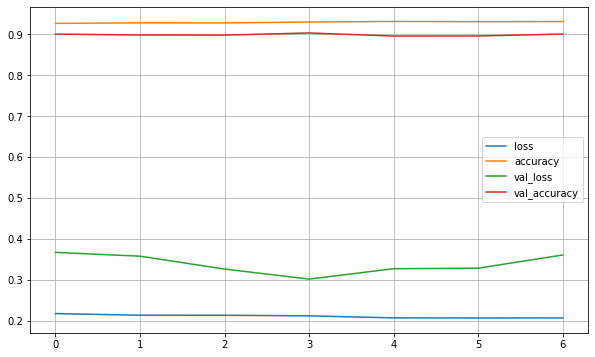

In [37]:
losses.plot()
plt.grid()

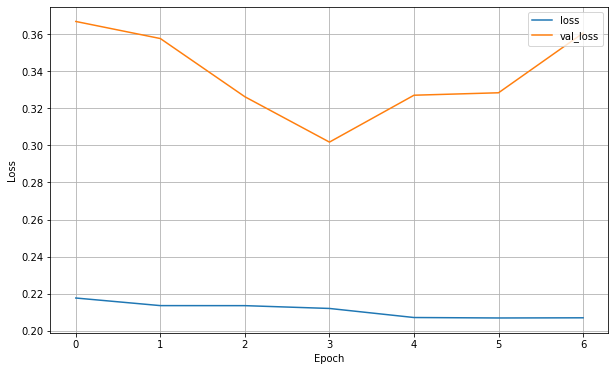

In [38]:
plt.plot(losses.loss, label="loss")
plt.plot(losses.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid()
plt.show()

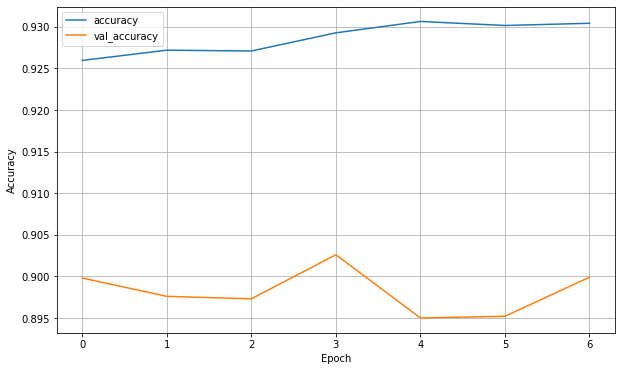

In [39]:
plt.plot(losses.accuracy, label="accuracy")
plt.plot(losses.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.grid()
plt.show()

### Model Evaluation

**Show the accuracy, precision, recall, f1-score the model achieved on the x_test data set.**

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
score = model.evaluate(X_test, y_cat_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.360604465007782
Test accuracy: 0.8999000191688538


In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.77      0.90      0.83      1000
           3       0.90      0.93      0.91      1000
           4       0.87      0.79      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.77      0.68      0.72      1000
           7       0.95      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [45]:
print(confusion_matrix(y_test, predictions))

[[853   1  17  20   4   1 102   0   2   0]
 [  5 978   3   9   1   0   3   0   1   0]
 [ 14   2 901   8  38   0  37   0   0   0]
 [ 18  12  11 925  13   0  20   0   1   0]
 [  1   0 135  39 786   0  38   0   1   0]
 [  0   0   0   1   0 972   0  17   0  10]
 [117   3 104  28  62   0 679   0   7   0]
 [  0   0   0   0   0  11   0 962   0  27]
 [  3   0   5   3   1   2   7   3 975   1]
 [  1   0   0   0   0   4   0  27   0 968]]


In [46]:
classes[6]

'Shirt'

<AxesSubplot:>

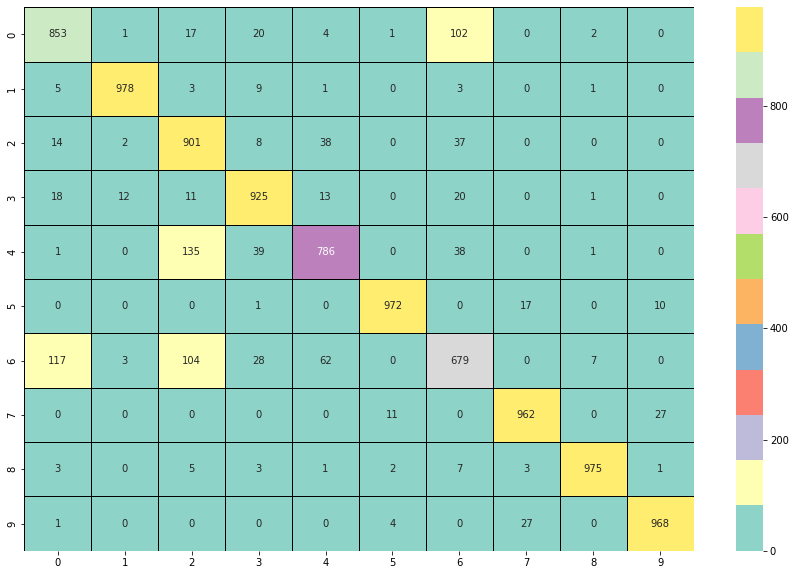

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Set3', fmt='g', linecolor='black', linewidth=1)

# Prediction

### one sample

In [48]:
img = X_test[10]
img.shape

(28, 28, 1)

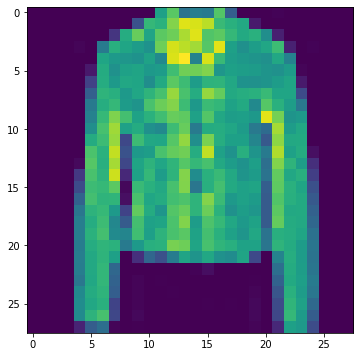

In [49]:
plt.imshow(img)

In [50]:
type(img)

numpy.ndarray

In [51]:
img_prediction = model.predict(img.reshape(1,28,28,1))
# resized_img = img.reshape(1,28,28,1)
# resized_img = np.expand_dims(img, axis=0)

In [52]:
np.argmax(img_prediction, axis=1)

array([4], dtype=int64)

In [53]:
classes[int(np.argmax(img_prediction, axis=1))]

'Coat'

In [54]:
classes[int(y_test[10])]

'Coat'

In [55]:
model.save('imgclass_model.h5')

### multiple samples

In [56]:
samples=[X_test[20],X_test[30],X_test[40],X_test[50]]

In [57]:
for img in samples:
    resized_img=np.expand_dims(img, axis=0)
    print(pd.Series(model.predict(resized_img).flatten(), index = classes).round(3))
    print(f"predicted class is : {classes[np.argmax(model.predict(resized_img))]}\n")

T-shirt/top    0.0
Trouser        0.0
Pullover       1.0
Dress          0.0
Coat           0.0
Sandal         0.0
Shirt          0.0
Sneaker        0.0
Bag            0.0
Ankle boot     0.0
dtype: float32
predicted class is : Pullover

T-shirt/top    0.0
Trouser        0.0
Pullover       0.0
Dress          0.0
Coat           0.0
Sandal         0.0
Shirt          0.0
Sneaker        0.0
Bag            1.0
Ankle boot     0.0
dtype: float32
predicted class is : Bag

T-shirt/top    0.943
Trouser        0.000
Pullover       0.000
Dress          0.000
Coat           0.000
Sandal         0.000
Shirt          0.057
Sneaker        0.000
Bag            0.000
Ankle boot     0.000
dtype: float32
predicted class is : T-shirt/top

T-shirt/top    0.000
Trouser        0.000
Pullover       0.006
Dress          0.000
Coat           0.993
Sandal         0.000
Shirt          0.001
Sneaker        0.000
Bag            0.000
Ankle boot     0.000
dtype: float32
predicted class is : Coat



### real life photo

In [58]:
from tensorflow.keras.models import load_model
model=load_model('imgclass_model.h5')

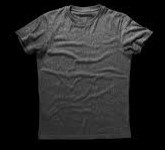

In [59]:
from tensorflow.keras.preprocessing import image
image.load_img("black.jpg")

In [60]:
imgGray = image.load_img("black.jpg", target_size=(28, 28))
print(np.array(imgGray).shape)

(28, 28, 3)


In [61]:
imgGray = tf.image.rgb_to_grayscale(imgGray)

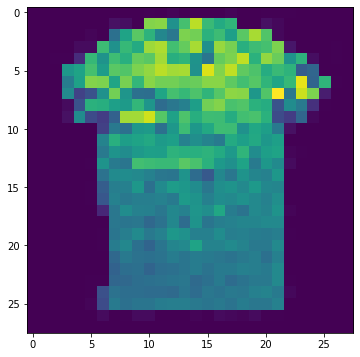

In [62]:
plt.imshow(imgGray)

In [63]:
np.array(imgGray).min(), np.array(imgGray).max()

(0, 136)

In [64]:
imgGray = imgGray/255
imgGray.shape

TensorShape([28, 28, 1])

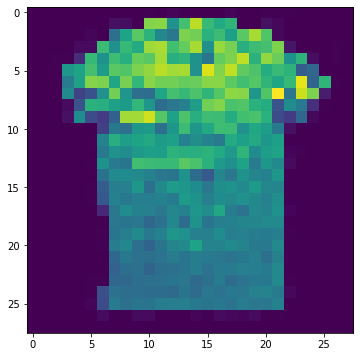

In [65]:
plt.imshow(imgGray)

In [66]:
imgGray = np.array(imgGray)
imgGray.shape

(28, 28, 1)

In [67]:
imgGray= np.expand_dims(imgGray, axis=0)
imgGray.shape

(1, 28, 28, 1)

In [68]:
pd.Series(model.predict(imgGray).round(3).flatten()) #.argmax()

0    0.561
1    0.001
2    0.008
3    0.037
4    0.006
5    0.000
6    0.383
7    0.000
8    0.005
9    0.000
dtype: float32

In [69]:
pd.Series(classes)

0    T-shirt/top
1        Trouser
2       Pullover
3          Dress
4           Coat
5         Sandal
6          Shirt
7        Sneaker
8            Bag
9     Ankle boot
dtype: object

In [70]:
classes[int(np.argmax(model.predict(imgGray), axis=1))]

'T-shirt/top'